202101544 마영준

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from collections import Counter
#from linear_algebra import distance, vector_subtract, scalar_multiply

#original version
def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

def distance(v, w):
    return math.sqrt(squared_distance(v, w))

def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

def vector_add(v, w):
    """adds two vectors componentwise"""
    return [v_i + w_i for v_i, w_i in zip(v,w)]

def vector_sum(vectors):
    return reduce(vector_add, vectors)

def vector_mean(vectors):
    """compute the vector whose i-th element is the mean of the
    i-th elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))


In [2]:
from functools import reduce
import math, random

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sum_of_squares(v):
    """computes the sum of squared elements in v"""
    return sum(v_i ** 2 for v_i in v)

vector = [i for i in range(10)]
sum_of_squares(vector)

np.sum(np.square(vector))


285

285

Text(0.5, 1.0, 'actual Derivatives vs. Estimates')

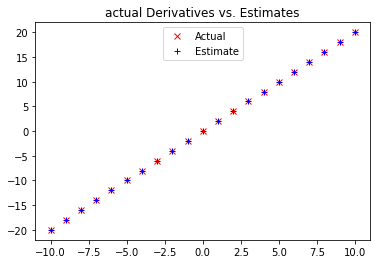

In [6]:
def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h

def square(x: float) -> float:
    return x * x

def derivative(x: float) -> float:
    return 2 * x

xs = range(-10,11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.0001) for x in xs]

# 두 계산식의 결괏값이 거의 비슷함을 보여 주기 위한 그래프
# plot to show they're basically the same
import matplotlib.pyplot as plt    
plt.title("actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual')
plt.plot(xs, estimates, 'b+', label='Estimate')
plt.legend(loc=9)
plt.show()                                       

In [7]:
def partial_difference_quotient(f, v, i, h):

    # add h to just the i-th element of v
    w = [v_j + (h if j == i else 0) # h를 v의 i번째 변수에만 더해주자
         for j, v_j in enumerate(v)]

    return (f(w) - f(v)) / h

def estimate_gradient(f, v, h=0.0001):
    return [partial_difference_quotient(f, v, i, h)
            for i, _ in enumerate(v)]


In [8]:
def step(v, direction, step_size):
    """move step_size in the direction from v"""
    return [v_i + step_size * direction_i
            for v_i, direction_i in zip(v, direction)]

def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

# 임의의 시작점을 선택
v = [random.randint(-10,10) for i in range(3)]
tolerance = 0.0000001   # 아주 작은 e값

while True:
    #print v, sum_of_squares(v)
    gradient = sum_of_squares_gradient(v)	# compute the gradient at v
    next_v = step(v, gradient, -0.0001)     	# take a negative gradient step
    if distance(next_v, v) < tolerance:     	# stop if we're converging
        break
    v = next_v                              		# continue if we're not
    #print(v)

print("minimum v", v)
print("minimum value", sum_of_squares(v))


minimum v [0.000212123174809165, 0.0002828308997455482, 0.0003535386246819393]
minimum value 2.4997911828399304e-07


In [9]:
# Using gradient descent to fit models

def gradient_step(v, gradient, step_size):
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return vector_add(v, step)

# x ranges from -50 to 49, y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]
print(inputs)

#def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
def linear_gradient(x, y, theta):
    slope, intercept = theta
    predicted = slope * x + intercept
    error = (predicted - y)
    squared_error = error ** 2
    grad = [2 * error * x, 2 * error]
    return grad


[(-50, -995), (-49, -975), (-48, -955), (-47, -935), (-46, -915), (-45, -895), (-44, -875), (-43, -855), (-42, -835), (-41, -815), (-40, -795), (-39, -775), (-38, -755), (-37, -735), (-36, -715), (-35, -695), (-34, -675), (-33, -655), (-32, -635), (-31, -615), (-30, -595), (-29, -575), (-28, -555), (-27, -535), (-26, -515), (-25, -495), (-24, -475), (-23, -455), (-22, -435), (-21, -415), (-20, -395), (-19, -375), (-18, -355), (-17, -335), (-16, -315), (-15, -295), (-14, -275), (-13, -255), (-12, -235), (-11, -215), (-10, -195), (-9, -175), (-8, -155), (-7, -135), (-6, -115), (-5, -95), (-4, -75), (-3, -55), (-2, -35), (-1, -15), (0, 5), (1, 25), (2, 45), (3, 65), (4, 85), (5, 105), (6, 125), (7, 145), (8, 165), (9, 185), (10, 205), (11, 225), (12, 245), (13, 265), (14, 285), (15, 305), (16, 325), (17, 345), (18, 365), (19, 385), (20, 405), (21, 425), (22, 445), (23, 465), (24, 485), (25, 505), (26, 525), (27, 545), (28, 565), (29, 585), (30, 605), (31, 625), (32, 645), (33, 665), (34, 

In [10]:
#from linear_algebra import vector_mean

# Start with random values for slope and intercept
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rate = .001

for epoch in range(5000):
    # Computer the mean of the gradients
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    # Take a step in that direction
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)
slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"


0 [33.48632483077111, -0.9587152699704308]
1 [10.998662622605693, -0.9333115145997186]
2 [25.997958719207407, -0.9304462289479134]
3 [15.993431088059708, -0.9125873777708102]
4 [22.666468876886405, -0.904768771927209]
5 [18.215560490344842, -0.8902927655064681]
6 [21.184330860174484, -0.8802966194851102]
7 [19.204171019644136, -0.8673516953859655]
8 [20.524950578201974, -0.8564128209755494]
9 [19.644001551518308, -0.8441750447553964]
10 [20.231606790092535, -0.8328426931143673]
11 [19.839685428315164, -0.820945400938046]
12 [20.101108873912846, -0.8094638247078547]
13 [19.926750917275424, -0.7977437881845261]
14 [20.043059394389108, -0.7862215496908815]
15 [19.965493162392775, -0.7746060471971106]
16 [20.01724145463682, -0.7630913419403236]
17 [19.9827368584153, -0.7515479178018061]
18 [20.005762967519193, -0.7400620851077873]
19 [19.99041603857959, -0.7285761979700525]
20 [20.000663926069443, -0.7171286295355328]
21 [19.993840032682147, -0.7056937083503924]
22 [19.99840300449266, -0.6

923 [19.999436520432358, 4.061806181447947]
924 [19.999437647053064, 4.063682005605483]
925 [19.99943877142121, 4.065554079241325]
926 [19.999439893541293, 4.067422409854264]
927 [19.99944101341781, 4.069287004928096]
928 [19.999442131055247, 4.071147871931658]
929 [19.999443246458082, 4.073005018318851]
930 [19.99944435963078, 4.074858451528671]
931 [19.9994454705778, 4.076708178985244]
932 [19.99944657930359, 4.078554208097851]
933 [19.9994476858126, 4.0803965462609595]
934 [19.999448790109255, 4.08223520085425]
935 [19.99944989219798, 4.0840701792426515]
936 [19.99945099208319, 4.085901488776364]
937 [19.99945208976929, 4.087729136790895]
938 [19.999453185260677, 4.089553130607082]
939 [19.999454278561736, 4.091373477531128]
940 [19.999455369676852, 4.0931901848546275]
941 [19.999456458610393, 4.095003259854595]
942 [19.999457545366724, 4.096812709793496]
943 [19.99945862995019, 4.098618541919276]
944 [19.99945971236514, 4.1004207634653875]
945 [19.999460792615917, 4.102219381650822

2125 [19.999949172007764, 4.9153713623968605]
2126 [19.99994927363322, 4.915540568844074]
2127 [19.999949375055486, 4.915709436980019]
2128 [19.99994947627497, 4.915877967481114]
2129 [19.999949577292075, 4.916046161022427]
2130 [19.999949678107207, 4.916214018277675]
2131 [19.999949778720772, 4.916381539919226]
2132 [19.999949879133165, 4.9165487266181085]
2133 [19.999949979344798, 4.916715579044006]
2134 [19.999950079356065, 4.916882097865263]
2135 [19.99995017916737, 4.917048283748889]
2136 [19.999950278779114, 4.917214137360558]
2137 [19.99995037819169, 4.917379659364616]
2138 [19.999950477405505, 4.917544850424078]
2139 [19.99995057642095, 4.917709711200636]
2140 [19.999950675238427, 4.917874242354656]
2141 [19.999950773858323, 4.918038444545185]
2142 [19.999950872281044, 4.918202318429953]
2143 [19.999950970506973, 4.918365864665374]
2144 [19.999951068536514, 4.91852908390655]
2145 [19.999951166370053, 4.918691976807273]
2146 [19.999951264007983, 4.918854544020029]
2147 [19.99995

3202 [19.99999411186978, 4.990196259645668]
3203 [19.999994123642505, 4.990215861238246]
3204 [19.999994135391688, 4.990235423639412]
3205 [19.999994147117384, 4.990254946927525]
3206 [19.999994158819632, 4.990274431180787]
3207 [19.999994170498486, 4.990293876477246]
3208 [19.999994182153987, 4.99031328289479]
3209 [19.999994193786186, 4.990332650511154]
3210 [19.999994205395126, 4.9903519794039175]
3211 [19.999994216980856, 4.990371269650505]
3212 [19.999994228543418, 4.990390521328185]
3213 [19.99999424008287, 4.990409734514071]
3214 [19.99999425159924, 4.990428909285126]
3215 [19.999994263092592, 4.990448045718155]
3216 [19.999994274562958, 4.990467143889812]
3217 [19.999994286010395, 4.990486203876595]
3218 [19.99999429743494, 4.990505225754853]
3219 [19.999994308836648, 4.990524209600778]
3220 [19.999994320215556, 4.990543155490413]
3221 [19.999994331571713, 4.990562063499648]
3222 [19.99999434290517, 4.99058093370422]
3223 [19.999994354215957, 4.990599766179717]
3224 [19.9999943

4273 [19.999999309653635, 4.998850572889742]
4274 [19.999999311033914, 4.998852871053616]
4275 [19.999999312411433, 4.998855164622543]
4276 [19.999999313786198, 4.9988574536057095]
4277 [19.999999315158213, 4.998859738012285]
4278 [19.999999316527486, 4.998862017851418]
4279 [19.99999931789402, 4.998864293132243]
4280 [19.99999931925782, 4.9988665638638725]
4281 [19.999999320618898, 4.998868830055403]
4282 [19.99999932197725, 4.998871091715911]
4283 [19.99999932333289, 4.998873348854456]
4284 [19.999999324685817, 4.99887560148008]
4285 [19.99999932603604, 4.998877849601805]
4286 [19.999999327383563, 4.998880093228638]
4287 [19.999999328728393, 4.998882332369564]
4288 [19.99999933007053, 4.998884567033553]
4289 [19.99999933140999, 4.998886797229557]
4290 [19.999999332746764, 4.998889022966508]
4291 [19.999999334080876, 4.998891244253322]
4292 [19.99999933541231, 4.998893461098897]
4293 [19.99999933674109, 4.998895673512111]
4294 [19.999999338067205, 4.9988978815018275]
4295 [19.99999933

In [11]:
# Minibatch and Stochastic Gradient Descent
from typing import TypeVar, List, Iterator

T = TypeVar('T')  # this allows us to type "generic" functions

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """Generates `batch_size`-sized minibatches from the dataset"""
    # start indexes 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    if shuffle: random.shuffle(batch_starts)  # shuffle the batches

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size = 20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"


0 [18.281992708494798, 1.4137874923659923]
1 [19.745855179671793, 1.2839109512508011]
2 [20.154684193306473, 1.2860280790280019]
3 [20.11403547946556, 1.3069481282989148]
4 [19.886310207617488, 1.3535700068410554]
5 [20.009728492997066, 1.37657031441014]
6 [20.17258293350476, 1.3903879448915581]
7 [20.113684067896656, 1.4082068682616773]
8 [19.86789060709385, 1.5640923564510965]
9 [20.12173276096803, 1.6253405445770484]
10 [19.869858561998523, 1.6683725545302879]
11 [21.314831524026353, 1.7480053557087492]
12 [19.773454990264028, 1.8216892165526575]
13 [19.989291747672443, 1.9559542237237606]
14 [19.85136978103446, 1.9682706058421229]
15 [19.872642099124565, 1.9715458474189547]
16 [19.302107144906618, 2.0022195028943557]
17 [19.640907354430798, 2.009097252499675]
18 [19.857319193418494, 2.2278759099426235]
19 [20.184455726601982, 2.2390358754840207]
20 [20.144376729474097, 2.2578504716820866]
21 [18.8397159501318, 2.3267456227024326]
22 [19.65276517178001, 2.3140522180075074]
23 [20.16

202101544 마영준